In [379]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
colours = ["#0065A9", "#985396", "#FF6D70", "#183838", "#959000", "#A1CE5E"]

In [380]:
def rma_pathloss(D=1000):

    r = np.arange(D+1)
    r[0]=1
    
    fc = 2.593 # n41
    fc = 3.550 # n78

    W = 20
    h = 5
    hBS = 35
    hUT = 1.5
    
    PL = 161.04 - 7.1 * np .log10(W)+ +7.5*np.log10(h)
    PL = PL - (24.37 - 3.7 * np.power(h/hBS, 2))* np.log10(hBS)
    PL = PL + (43.42 - 3.1 * np.log10(hBS)) *(np.log10(r) -3)
    PL = PL + 20 * np.log10(fc) - np.power ((3.2 * (np.log10(11.75 * hUT))), 2) - 4.97
    return r, PL

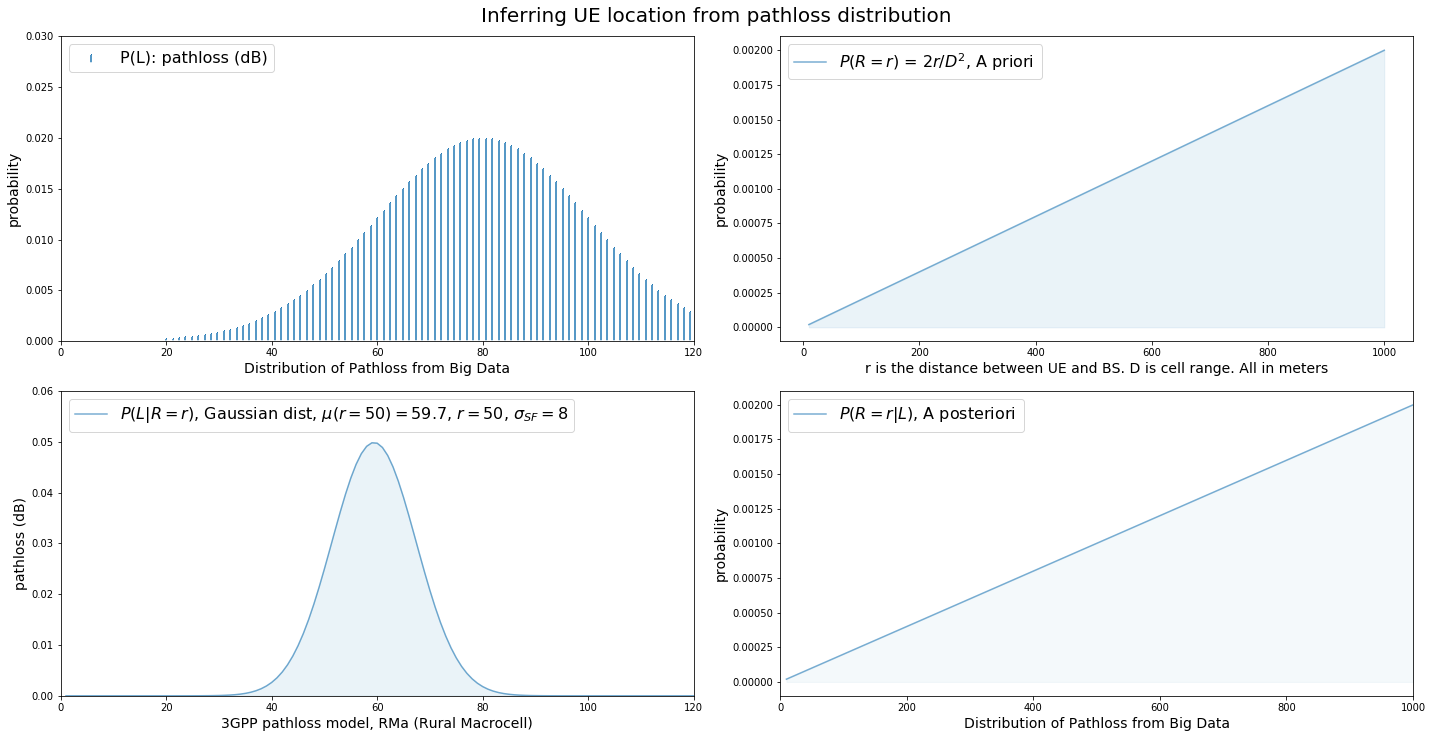

In [381]:
fig,axs= plt.subplots(2, 2, sharex='none', sharey='col')
fig.set_size_inches((20,10))
plt.subplots_adjust(hspace=.3)
legend_size = 16
label_size = 14
font_size = 14

# -------------
# Fig1: P(L)
# -------------

ax = plt.subplot(2, 2, 1)
ax.set_xlim([0, 120]) 
ax.set_ylim([0, 0.03]) 
#draw Gaussian
mu = 80
sigma = 20
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ProbPathLoss = stats.norm.pdf(x, mu, sigma)

plt.stem(x, ProbPathLoss, use_line_collection=True, basefmt='w',  markerfmt=',', label = "P(L): pathloss (dB)")
plt.xlabel("Distribution of Pathloss from Big Data", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})

# -------------
# Fig2: P(R)
# ------------
ax = plt.subplot(2, 2, 2)
D = 1000
r = np.linspace(10, D, D)
pR = (2/np.power(D,2))*r
plt.plot(r,pR, label = r"$P(R=r)$ = $2r/D^2$"+", A priori ", alpha=0.6)
plt.fill_between(r, 0, pR, color="#348ABD", alpha=0.1)
plt.xlabel("r is the distance between UE and BS. D is cell range. All in meters", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})




# -------------
# Fig3: P(L|R)
# ------------
ax = plt.subplot(2, 2, 3)
ax.set_xlim([0, 120]) 
ax.set_ylim([0, 0.06]) 

D = 1000
r, PL = rma_pathloss(D)

mu_r = PL[50]
sigma = 8

x = np.linspace(mu_r - 3 * sigma, mu_r + 3 * sigma, 100)
x=r
PLgivenR = stats.norm.pdf(x, mu_r, sigma)


plt.plot(x, PLgivenR, label = r"$P(L|R=r)$, Gaussian dist, $\mu(r=50)=59.7$, $r=50$, $\sigma_{SF}=8$", alpha=0.6)
plt.fill_between(x, 0, PLgivenR, color="#348ABD", alpha=0.1)
plt.xlabel("3GPP pathloss model, RMa (Rural Macrocell)", fontsize=font_size)
plt.ylabel("pathloss (dB)", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})


# -------------
# Fig4: P(R|L)
# ------------
ax = plt.subplot(2, 2, 4)
ax.set_xlim([0, 1000]) 
# ax.set_ylim([0, 0.06]) 





D = 1000
r = np.linspace(10, D, D)
pR = (2/np.power(D,2))*r
plt.plot(r,pR, label = r"$P(R=r|L)$"+", A posteriori ", alpha=0.6)
plt.fill_between(r, 0, pR, color="#348ABD", alpha=0.05)
plt.xlabel("r is the distance between UE and BS. D is cell range. All in meters", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})



plt.xlabel("Distribution of Pathloss from Big Data", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})




# -------------
# Final
# ------------


plt.suptitle("Inferring UE location from pathloss distribution",
             y=1.02,
             fontsize=20)

plt.tight_layout()
plt.show()


In [382]:
mu_r

59.402926722503054

In [383]:

ls = np.linspace(1, 120, 120)
rs, PL = rma_pathloss(D)
sigma = 8



In [384]:
mu_r = PL[3]
q = stats.norm.sf(rs, mu_r, sigma)
mu_r


12.198768603027936

0.02392177274169416

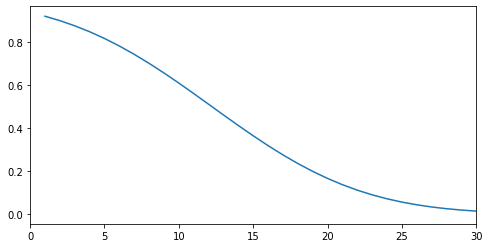

In [385]:

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rs, q)
ax.set_xlim([0, 30])
q[2]-q[3]

In [386]:
for l in range(120):
    for r in range(D):
        i = np.int_(r)
        mu_r = PL[i-1]
        q = stats.norm.sf(rs, mu_r, sigma)
        delta = q[l]-q[l+1]
        pLgivenR = delta * ( 2 * r +1)/D
 



In [387]:
mu = 0
sigma = 1
x = np.linspace(mu - 3 * sigma, mu_r + 3 * sigma, 100)


In [388]:
def get_q(x, mu = 0, sigma = 1):
    
    a = (x - mu) / sigma
    q_range = 6
    q_resol = 1000
    
    if a > (q_range-1): 
        return 0
    if a < 0:
        return 1 - qet_q((-1)*x, mu, sigma)    

    xs = np.linspace(0, q_range, q_resol)
    q = stats.norm.sf(xs)
    
    return q[np.int_(a / ( q_range / q_resol ))]
      

In [389]:
a=-12
-a

12

In [390]:
s = get_q(2.0)
s

0.022750131948179195

In [391]:
r = 50
D = 1000
rs, PL = rma_pathloss(D)

mu_r = PL[r]
sigma = 8

# r: distance between UE and BS in meters
# D: cell range in meters
def get_prob_L_given_R(L, r):
    mu = PL[r]
    sigma = 8
    q = stats.norm.sf(rs, mu, sigma)
    
    qL0 = get_q(L, mu, sigma)
    qL1 = get_q(L+1, mu, sigma)
    
    prob = qL0 - qL1
    return prob

In [392]:
r = 500
L = 59
get_prob_L_given_R(L, r)

NameError: name 'qet_q' is not defined

In [ ]:
L_max = 140
x = np.arange(L_max)
y = np.zeros(L_max)


for i in range(L_max):
    y[i] = get_prob_L_given_R(i, r)

    
def get_L_distribution_give_R(r):
    x = np.arange(L_max)
    y = np.zeros(L_max)
    for l in range(L_max):
        y[l] = get_prob_L_given_R(l, r)
    return x, y


In [ ]:
colours = ["#DD3232", "#F68B69", "#FBAF5F", "#FACF63", "#FFEF6C",
            "#CED75C", "#A1CE5E", "#969A52", "#00919C","#0065A9", "#955396"]

for i in range(10):
    r = 100 * (i+1)
    x, y = get_L_distribution_give_R(r)
    plt.plot(x, y, color = colours[i], label = "R={}".format(r))


plt.xlabel("pathloss (dB)", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})

plt.legend()

In [ ]:
y

In [ ]:
sum(y)

In [ ]:
def get_prob_R(r, D):
    
    p = 2 * r / np.power(D,2)
    
    return p


def get_prob_L(L):
    
    return 1/(L_max-L_min)


def get_prob_R_given_L(r, l, D):
    
    pLR = get_prob_L_given_R(l, r)
    pR  = get_prob_R(r, D)
    pL  = get_prob_L(l)
  
    pRL = pLR * pR  / pL
    
    return pRL

In [ ]:
colours = ["#DD3232", "#F68B69", "#FBAF5F", "#FACF63", "#FFEF6C",
            "#CED75C", "#A1CE5E", "#969A52", "#00919C","#0065A9", "#955396"]

for i in range(10):
    r = 100 * (i+1)
    x, y = get_L_distribution_give_R(r)
    plt.plot(x, y, color = colours[i], label = "R={}".format(r))


plt.xlabel("pathloss (dB)", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="upper left", prop={'size': legend_size})

plt.legend()

In [ ]:
def get_R_distribution_give_L(l, D):
    x = np.arange(D)
    y = np.zeros(D)
    for r in range(D):
        y[r] = get_prob_R_given_L(r = r, l = l, D = D)
    return x, y

In [ ]:
 
for i in range(2):
    l = 40 * i + 60
    x, y = get_R_distribution_give_L(l, D = 1000)
    print (sum(y))
    plt.plot(x, y, color = colours[(i*2)%10], label = "l={}".format(l))

    
plt.xlabel("distance between UE and BS", fontsize=font_size)
plt.ylabel("probability", fontsize=label_size)
plt.legend(loc="lower right", prop={'size': legend_size})

#plt.legend()

In [ ]:
sum(y)